## COMP3670/6670 Programming Assignment 2 - Clustering and Vector Calculus
---

**Enter Your Student ID: u7205329** 

**Your Name: Thao Pham**
    
**Deadline: 23:59 13 September 2020**

**Submit:** Write your answers in this file, and submit a single Jupyter Notebook file (.ipynb) on Wattle. Rename this file with your student number as 'uXXXXXXX.ipynb'.

**Enter Discussion Partner IDs Below:**
You could add more IDs with the same markdown format above.

**Programming Section**:
- 1.1: 15%
- 1.2: 20%
- 2.1: 10%
- 2.2: 15%
- 2.3: 15%
- 2.4: 10%
- 2.5: 10%
- 2.6: 5%

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.core.display import HTML

np.random.seed(1)


## Task1: Vector Calculus 
-----------
This part is about vector calculus. In this section, we will use the rigorous definition of the derivative to calculus it.
$$ f'(a) = \lim_{h \to 0}\dfrac{f(a + h) - f(a)}{h}$$
Now, expand it to vectors.

-----
**Task 1.1:** Calculate the gradient of $f(\textbf{x}) = \textbf{x}^T\textbf{a}$ respect to $\textbf{x}$.     $\textbf{x}, \textbf{a} \in \mathbb{R}^N$

In [2]:
N = 10
x = np.random.rand(N)
a = np.random.rand(N)

**Student's Note:** When calculating by hand, we have derived $\frac{df(\textbf{x})}{d\textbf{x}} = \textbf{a}^T$. We want to compare our final answer with this. 

In [3]:
def derive_function1(x, a, N):
    # The answer is a vector
    # Please follow the rigorous defination of derivative to answer this question
    # Directly return the conclusion from textbook will not receive any mark.
    
    h = 1e-4
    # Your Code Here
    
    answer = np.zeros(N)
    fx = np.dot(x,a)
    
    i = 0
    while i < len(x):
        
        new_x = np.zeros(N)
        
        n = 0
        while n < len(x):
            if n == i:
                new_x[n] = x[n] + h
            else:
                new_x[n] = x[n] 
            n += 1
        
        f_XplusH = np.dot(new_x,a)
        derivs = (f_XplusH - fx)/h
        answer[i] = derivs
        
        i += 1

    return answer


In [4]:
derive_function1(x,a,N)

array([0.41919451, 0.6852195 , 0.20445225, 0.87811744, 0.02738759,
       0.67046751, 0.4173048 , 0.55868983, 0.14038694, 0.19810149])

In [5]:
a

array([0.41919451, 0.6852195 , 0.20445225, 0.87811744, 0.02738759,
       0.67046751, 0.4173048 , 0.55868983, 0.14038694, 0.19810149])

-----
**Task 1.2:** Calculate the gradient of $f(\textbf{x}) = \textbf{x}^TB\textbf{x}$ respect to $\textbf{x}$.     $\textbf{x}\in \mathbb{R}^N, B\in \mathbb{R}^{N\times N}$

In [6]:
x = np.random.rand(N)
B = np.random.rand(N, N)

**Student's Note:** When calculating by hand, we have derived $\frac{df(\textbf{x})}{d\textbf{x}} = \textbf{x}^T(\textbf{B}+\textbf{B}^T)$. We want to compare our final answer with this. 

In [7]:
def func(x, B):
    xT = x.T
    xTB = xT@B
    return xTB @ x

In [8]:
def derive_function2(x, B, N):
    # The answer is a vector
    # Please follow the rigorous defination of derivative to answer this question
    # Directly return the conclusion from textbook will not receive any mark.
    
    h = 1e-5
    # Your Code Here
    
    answer = np.zeros(N)
    
    i = 0
    while i < len(x):
        new_x = np.zeros(N)
        n = 0
        while n < len(x):
            if n == i:
                new_x[n] = x[n] + h
            else:
                new_x[n] = x[n]
            n += 1
        
        derivs = (func(new_x, B) - func(x,B))/h
        answer[i] = derivs
        i += 1
    return answer

In [9]:
derive_function2(x, B, N)

array([5.56160702, 5.28064133, 4.80625464, 5.24104496, 5.08233431,
       6.22524728, 6.71982088, 7.18585732, 4.74990674, 4.70465728])

In [10]:
np.dot(x, B + B.T)

array([5.56160603, 5.28063384, 4.80625252, 5.24104082, 5.08233033,
       6.22523833, 6.71981185, 7.18584803, 4.74989962, 4.70465449])

## Task2: Clustering
-----------
These programming exercises will focus on K-means clustering. 

If you're unsure of how k-means works, read this very helpful and freely available online breakdown from Stanford's CS221 course; https://stanford.edu/~cpiech/cs221/handouts/kmeans.html

This assignment requires you to loosely interpret how k-means is a specific case of a more general algorithm named Expectation Maximisation. This is explained toward the end of the above article.

First, lets loading the dataset.

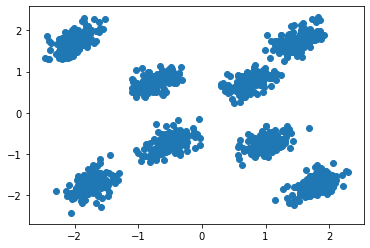

In [11]:
X = np.load("./data.npy")
plt.scatter(X[:,2], X[:,3])
plt.show()

The dataset contains 1000 4-dimensional samples. However, we don't know how many centroids it contains. The number of centroids is more than 5 but less than 10. We need to figure it out in the clustering procedure.

-----

K-means is a special, simple case of the Expectation Maximisation (EM) algorithm.

This simplified EM (k-means), is divided into two steps.

The **E-Step**, where for every sample in your dataset you find which "centroid" that datapoint is closest to that sample, and record that information.

The **M-Step**, where you move each "centroid" to the center of the samples which were found to be closest to it in the **E-Step**.

Each *centroid* is simply an estimated mean of a cluster. If you have $1$ centroid, then this centroid will become the mean of all your data.

If each of your samples, such as the 400 you generated in the previous question, are of dimension $n$, then each of your centroids will be of dimension $n$.

Centroids are initially random values, and the k-means algorithm attempts to modify them so that each one represents the center of a cluster.

---

**TASK 2.1:** Write a function $initialise\_parameters(m, n, X) = C$ which generates $m$ centroids, each of dimension $n$, and stores them in a matrix $C \in \mathbb{R}^{m \times n}$.

No two centroids should be the same, and **must not** be hard coded. Generate these parameters using a sensible initialisation method such as those described in the first link below. You will be judged based on whether the method you choose is sensible and likely to result in kmeans converging to good result.

---

**HINT:** 
- https://en.wikipedia.org/wiki/K-means_clustering#Initialization_methods
- https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html

**Student's Note:** The initialisation method that has been chosen for this task is the K-means++ method. After experimenting, I found that the Forgy method (choosing initial parameters at random) generally does not perform well albeit its low time complexity. On the other hand, K-means++ algorithm is a more specific approach as we are choosing new centers based on the chosen ones. The algorithm implemented below is a result of careful research and comprehension from the following websites

- http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf  
- https://en.wikipedia.org/wiki/K-means%2B%2B

In [12]:
def total_Dx(x, C):
    Dx_list = []
    indices = []
    
    for j in range(len(x)):
        data_point = x[j]
        
        if data_point not in C:
            distance_ls = [np.linalg.norm(data_point - centroid)**2 for centroid in C]
            
            Dx = min(distance_ls)
            
            Dx_list.append(Dx) # Dx
            indices.append(j) # true position in x
        j += 1

    max_probs = max(Dx_list)
    index = Dx_list.index(max_probs)
    chosenC = indices[index]
    
    return X[chosenC]

In [13]:
def initialise_parameters(m, n, X):
    C = np.zeros((m,n))
    (row, col) = np.shape(X)
    chosen_index = np.zeros(m)
    
    # Choose the first random centroid by select a random row
    centroid_index = np.random.randint(0, row)
    chosen_centroid = X[centroid_index]
    C[0] = chosen_centroid
    
    # Use kmeans++ to find the other centroids
    i = 0
    while i < m-1:
        another_centroid = total_Dx(X, C)
        C[i+1] = another_centroid
        i += 1
        
    return np.array(C)

C = initialise_parameters(8, 4, X)
print(C)

[[-0.02172266  0.1548916  -0.34724541 -0.65382   ]
 [ 0.05728334 -0.63714316 -2.43718215  1.85767139]
 [-0.14927841  0.06458037  1.81895385  2.32908797]
 [-0.42788084 -0.32584782  2.22470563 -1.77273841]
 [ 0.25613997  0.22100056 -2.0508867  -2.44353477]
 [-0.50667441  0.89372857  1.30526913 -0.68592009]
 [ 0.52141611  0.77711458  1.00499383  0.96538047]
 [-0.66383615  0.63493587 -1.62047788  1.951082  ]]


Now we implement k-means.

---
   **TASK 2.2:** Create a function $E\_step(C, X) = L$, where $L$ is a matrix of the same dimension of the dataset $X$.
   
   This function is is the **E-Step** (or "assignment step") mentioned earlier.

---

**HINT:** 
- https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
- https://en.wikipedia.org/wiki/K-means_clustering#Standard_algorithm
- Each row of $L$ is a centroid taken from $C$.

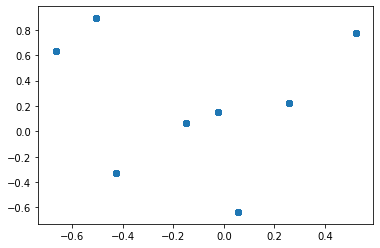

In [14]:
def E_step(C, X):
    L = np.zeros(X.shape)
    
    i = 0
    while i < len(X):
        data_point = X[i]
        
        # Calculate the distance from the data point to each centroid
        distance_ls = [np.linalg.norm(data_point - centroids)**2 for centroids in C]
        
          
        # Find the centroid with the minimum distance from the current data point
        min_distance = min(distance_ls) 
        z = C[distance_ls.index(min_distance)]
        
        # Assignment 
        L[i] = z
        i += 1
    
    return L

L = E_step(C, X)
plt.scatter(L[:, 0], L[:, 1])
plt.show()

---

**TASK 2.3:** Create a function $M\_step(C, X, L) = C$ which returns $C$ modified so that each centroid in $C$ is placed in the middle of the samples assigned to it. This is the **M-Step**.

In other words, make each centroid in $C$ the average of all the samples which were found to be closest to it during the **E-step**. This is also called the "update step" for K-means.

---

**HINT:** https://docs.scipy.org/doc/numpy/reference/generated/numpy.array_equal.html

In [15]:
def M_step(C, X, L):
    total = []
    count = []
    
    row, col = X.shape
    for n in range(len(C)):
        total.append(np.zeros(col))

    count = [0 for n in range(len(C))]
    
    # Calculating the total and count for each cluster
    for i in range(len(X)):
        data_point = X[i]
        
        for n in range(len(C)):
            if np.array_equal(L[i], C[n]):
                total[n] += data_point
                count[n] += 1

    # Calculating the new centroids          
    new_C = [total[n] / count[n] for n in range(len(total))]

    return np.array(new_C)

M_step(C, X, L)

array([[ 0.02011004, -0.03331383, -0.45094925, -0.18109962],
       [ 0.05169725, -0.13352664, -2.02712668,  1.69733602],
       [-0.05121033, -0.00579613,  1.52889715,  1.77957979],
       [-0.02027519, -0.0114009 ,  1.76075833, -1.72990207],
       [ 0.02110326, -0.03111854, -1.73753137, -1.75947269],
       [-0.07504623,  0.12156962,  1.08389059, -0.74741854],
       [ 0.01875648,  0.05083002,  0.76855718,  0.8336889 ],
       [-0.16406254,  0.27374291, -1.54186471,  1.50958264]])

---
**TASK 2.4:** Implement $kmeans(X, m, i) = C, L$ which takes a dataset $X$ (of any dimension) and a scalar value $m$, and uses the previous 3 functions you wrote to:
- generate $m$ centroids.
- iterate between the E and M steps $i$ times (ie, it iterates $i$ times) to classify the $m$ clusters.

...and then returns:
- $C$, the centers of the $m$ clusters after $i$ iterations.
- $L$, the labels (centroid values) assigned to each sample in the dataset after $i$ iterations.
---

In [16]:
def kmeans(X, m, i):
    L = np.zeros(X.shape)
    C = np.zeros((m, X.shape[1]))
    
    (row, col) = np.shape(X)
    
    C = initialise_parameters(m, col, X)
    
    niter = 0
    while niter < i:
        L = E_step(C, X)
        C = M_step(C, X, L)
        niter += 1

    return C, L

---
**Task 2.5:** The following code is to display the result. However, due to the limitation of our visualization tools, it can only presents the data in the two dimensional space. While the dimension of the dataset is 4, we really want to visualize the data in the two dimensional figure. Besides, the number of centroids is not determined yet.

This task is ask you to modify the following code so as to give the best visualization effect. 

---
**HINT:** You only need to change "number of centroid", "dimension1", "dimension2" to a number, which are quoted by "#" in the following code. 

Initial Parameters:
[[-0.02172266  0.1548916  -0.34724541 -0.65382   ]
 [ 0.05728334 -0.63714316 -2.43718215  1.85767139]
 [-0.14927841  0.06458037  1.81895385  2.32908797]
 [-0.42788084 -0.32584782  2.22470563 -1.77273841]
 [ 0.25613997  0.22100056 -2.0508867  -2.44353477]
 [-0.50667441  0.89372857  1.30526913 -0.68592009]
 [ 0.52141611  0.77711458  1.00499383  0.96538047]
 [-0.66383615  0.63493587 -1.62047788  1.951082  ]]

Final Parameters:
[[ 1.80182894e-02 -2.84548382e-02 -1.73314207e+00 -1.74422749e+00]
 [-1.08975530e-02  1.26213183e-02 -2.01514271e+00  1.74712290e+00]
 [-2.68311120e-03  1.72757846e-02  1.49565927e+00  1.75278340e+00]
 [-2.30938038e-02  1.71549863e-02  1.76052530e+00 -1.73716493e+00]
 [-1.61647729e-02  2.54639072e-02  1.00871817e+00 -7.26380789e-01]
 [-3.12595827e-02  7.66544119e-03  7.32444784e-01  7.23499116e-01]
 [-2.05541611e-02 -2.94840798e-03 -7.34726213e-01  7.52580271e-01]
 [-1.15362482e-03  3.56500354e-02 -5.02332315e-01 -7.41382419e-01]]


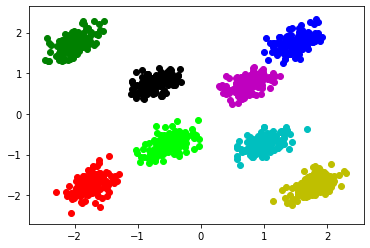

In [23]:
m = 8 #number of centroid
i = 100
#CODE TO DISPLAY YOUR RESULTS.
C_final, L_final = kmeans(X, m, i)
print('Initial Parameters:')
print(C)
print('\nFinal Parameters:')
print(C_final)

def allocator(X, L, c):
    cluster = []
    for i in range(L.shape[0]):
        if np.array_equal(L[i, :], c):
            cluster.append(X[i, :])
    return np.asarray(cluster)

colours = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'lime', 'wheat', 'fuchsia', 'pink']
for i in range(m):
    cluster = allocator(X, L_final, C_final[i, :])
    plt.scatter(cluster[:,2], #dimension1
                cluster[:,3], #dimension2
                c=colours[i])
plt.show()

---
**TASK 2.6:** Use your own words to explain how you found the number of centroids in Task 2.5 and how you might do this in the real world.

---

**Student's Note:** 

As mentioned above, the number of centroids (k) is more than 5 but less than 10. Thus, we will perform k-means clustering with each proposed value of k. After getting the final clusters, we calculate the loss function to determine how well the algorithm has performed. Plotting k vs its corresponding loss function, we use the elbow method to find the optimal k.  

In the real world, before performing clustering on any given dataset, we want to investigate our data (number of dimensions, data quality, etc.) and the proximity of each data point to one another to determine **the range of k** there should be. We then perform k-means clustering on the data with this presumption in mind. After that, we calculate the sum of squares residuals (or loss function) and plot against the value of k (as we have done here) to determine k. 

As the implications of our clustering are greater in the real world, we may use the Elbow Method in conjuction with other validation methods (e.g. The Silhouette Method) to find the optimal k. 

In [24]:
def loss_func(X, L_final, C_final):
    loss = 0
    for i in range(len(X)):
        data_point = X[i]
        z = L_final[i]
        loss += np.linalg.norm(data_point - z)**2
    return loss

In [25]:
K = np.arange(6, 10, 1)

loss_info = []

for k in K:
    i = 80
    C_final, L_final = kmeans(X, k, i)
    loss = loss_func(X, L_final, C_final)
    loss_info.append(loss)

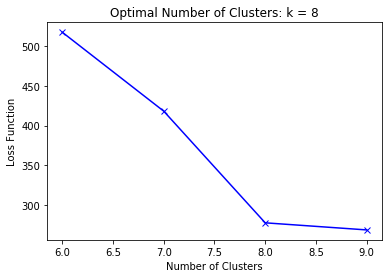

In [26]:
plt.plot(K, loss_info, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Loss Function')
plt.title('Optimal Number of Clusters: k = 8')
plt.show()